# Data Summaries

In this lecture we will get to know and become experts in:
1. [Data Manipulation with pandas](#Data-Manipulation-with-pandas)
    * [Handling Files](#Handling-Files)
    * Counting and Summary Statistics
    * [Grouped Operations](#Grouped-Operations)
2. [Plotting](#Plotting)
    * matplotlib
    * pandas

And if you want to delve deeper, look at the 
[Advanced topics](#Advanced-topics)

Relevant DataCamp lessons:

* [Data manipulation with pandas](https://campus.datacamp.com/courses/data-manipulation-with-pandas), Chaps 2 and 4
* [Matplotlib](https://campus.datacamp.com/courses/intermediate-python), Chap 1

In [ ]:
import pandas as pd
import numpy as np

## Data Manipulation with pandas

While we have seen panda's ability to (i) mix data types (strings, numbers, categories, Boolean, ...) and (ii) refer to columns and rows by names, this library offers a lot more powerful tools for efficiently gaining insights from data, e.g.

- summarize/aggregate data in efficient pivot style manners
- handling missing values
- visualize/plot data






In [ ]:
!pip install gapminder
from gapminder import gapminder

## Handling Files

Get to know your friends

* `pd.read_csv`
* `pd.read_table`
* `pd.read_excel`

But before that we need to connect to our Google drives ! (more instructions can be found [here](https://gist.github.com/kelly-sovacool/c33b64b70164be37d75bd40c9b56b498))

In [ ]:
"Sam" + " Altman" 

'Sam Altman'

Counting and Summary Statistics

In [ ]:
gapminder.sort_values(by="year").head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
528,France,Europe,1952,67.410,42459667,7029.809327
540,Gabon,Africa,1952,37.003,420702,4293.476475
1656,West Bank and Gaza,Asia,1952,43.160,1030585,1515.592329
552,Gambia,Africa,1952,30.000,284320,485.230659


In [ ]:
#How many countries?
CtryCts = gapminder["country"].value_counts()
CtryCts
#note the similarity with np.unique(..., return_counts=True)

Afghanistan          12
Pakistan             12
New Zealand          12
Nicaragua            12
Niger                12
                     ..
Eritrea              12
Equatorial Guinea    12
El Salvador          12
Egypt                12
Zimbabwe             12
Name: country, Length: 142, dtype: int64

## Grouped Operations

The gapminder data is a good example for wanting to apply functions to subsets to data that correspond to categories, e.g.
* by year
* by country
* by continent

The powerful pandas `.groupby()` method enables exactly this goal rather elegantly and efficiently.

First, think how you could possibly compute the average GDP seprataley for each continent. The `numpy.mean(..., axis=...)` will not help you. 

Instead you will have to manually find all continents and then use Boolean logic:

In [ ]:
continents =np.unique(gapminder["continent"])
continents

array(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'], dtype=object)

In [ ]:
AfricaRows = gapminder["continent"]=="Africa"
gapminder[AfricaRows]["gdpPercap"].mean()


In [ ]:
#you could use a for loop instead, of course
gapminder[gapminder["continent"]=="Africa"]["gdpPercap"].mean()
gapminder[gapminder["continent"]=="Americas"]["gdpPercap"].mean()
gapminder[gapminder["continent"]=="Asia"]["gdpPercap"].mean()
gapminder[gapminder["continent"]=="Europe"]["gdpPercap"].mean()
gapminder[gapminder["continent"]=="Oceania"]["gdpPercap"].mean()

18621.609223333333

Instead, we should embrace the concept of **grouping by a variable**

In [ ]:
gapminder.mean()

<ipython-input-8-451a80012f7c>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  gapminder.mean()


year         1.979500e+03
lifeExp      5.947444e+01
pop          2.960121e+07
gdpPercap    7.215327e+03
dtype: float64

In [ ]:
byContinent = gapminder.groupby("continent")
byContinent.mean()

<ipython-input-12-91beadf16788>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  byContinent.mean()


,year,lifeExp,pop,gdpPercap
continent,,,,
Africa,1979.5,48.865330,9.916003e+06,2193.754578
Americas,1979.5,64.658737,2.450479e+07,7136.110356
Asia,1979.5,60.064903,7.703872e+07,7902.150428
Europe,1979.5,71.903686,1.716976e+07,14469.475533
Oceania,1979.5,74.326208,8.874672e+06,18621.609223


In [ ]:
#only lifeExp:
byContinent["lifeExp"].max()
#maybe there is more to life than the mean

76.442

In [ ]:
byContinent["gdpPercap"].agg([min,max, np.mean])

,min,max,mean
continent,,,
Africa,241.165876,21951.21176,2193.754578
Americas,1201.637154,42951.65309,7136.110356
Asia,331.000000,113523.13290,7902.150428
Europe,973.533195,49357.19017,14469.475533
Oceania,10039.595640,34435.36744,18621.609223


In [ ]:
#multiple aggregating functions (no built in function mean)
gapminder.groupby("continent")["gdpPercap"].agg([min,max, np.mean])

,min,max,mean
continent,,,
Africa,241.165876,21951.21176,2193.754578
Americas,1201.637154,42951.65309,7136.110356
Asia,331.000000,113523.13290,7902.150428
Europe,973.533195,49357.19017,14469.475533
Oceania,10039.595640,34435.36744,18621.609223


In [ ]:
byContinentYear = gapminder.groupby(["continent", "year"])["gdpPercap"]
byContinentYear.mean()

In [ ]:
#multiple keys
gapminder["past1990"] = gapminder["year"] > 1990
byContinentYear = gapminder.groupby(["continent", "past1990"])["gdpPercap"]
byContinentYear.mean()

continent  past1990
Africa     False        1997.008411
           True         2587.246913
Americas   False        6051.047533
           True         9306.236000
Asia       False        6713.113041
           True        10280.225202
Europe     False       11341.142807
           True        20726.140986
Oceania    False       15224.015414
           True        25416.796842
Name: gdpPercap, dtype: float64

---------------------------------------

### Titanic data

In [ ]:
# Since pandas does not have any built in data, I am going to "cheat" and 
# make use of the `seaborn` library
import seaborn as sns 

titanic = sns. load_dataset('titanic')
titanic["3rdClass"] = titanic["pclass"]==3
titanic["male"] = titanic["sex"]=="male"

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,3rdClass,male
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,True,True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,True,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,False,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,False,False
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,True,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,False,True


In [ ]:
#overall survival rate
titanic.survived.mean()

0.3838383838383838

Tasks:

- compute the proportion of survived separately for 
  * male/female
  * the three classes
  * Pclass and sex 

- compute the mean age separately for male/female

In [ ]:
#I would like to compute the mean survical seprately for each group
bySex = titanic.groupby("sex")
#here I am specifically asking for the mean
bySex["survived"].mean()
#if you want multiple summaries, you can list them all inside the agg():
bySex["survived"].agg([min, max, np.mean ])

,min,max,mean
sex,,,
female,0,1,0.742038
male,0,1,0.188908


In [ ]:
#I would like to compute the mean survical seprately for each group
bySexPclass = titanic.groupby(["pclass", "sex"])
#here I am specifically asking for the mean
bySexPclass["survived"].mean()

pclass  sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: survived, dtype: float64

In [ ]:
bySex = titanic.groupby("sex")
#here I am specifically asking for the mean
bySex["survived"].mean()

## Plotting

We will not spend much time with basic plots in matplotlib but instead move quickly toward the pandas versions of these functions.

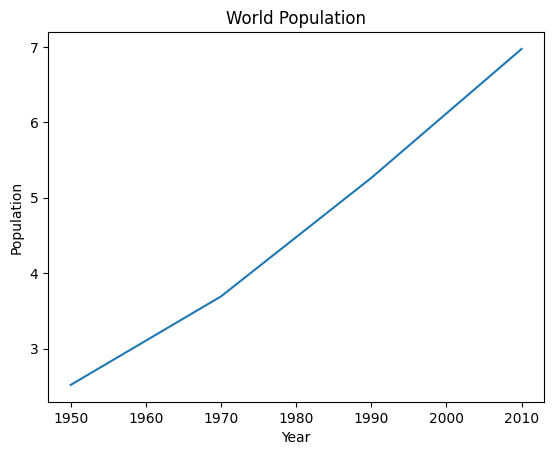

In [ ]:
#%matplotlib inline
import matplotlib.pyplot as plt

#plt.rcParams['figure.dpi'] = 800
year = [1950, 1970, 1990, 2010]
pop = [2.519, 3.692, 5.263, 6.972]
plt.plot(year, pop)
#plt.bar(year, pop)
#plt.scatter(year, pop)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('World Population')
x = 1
#plt.show()

pandas offers plots directly from its objects

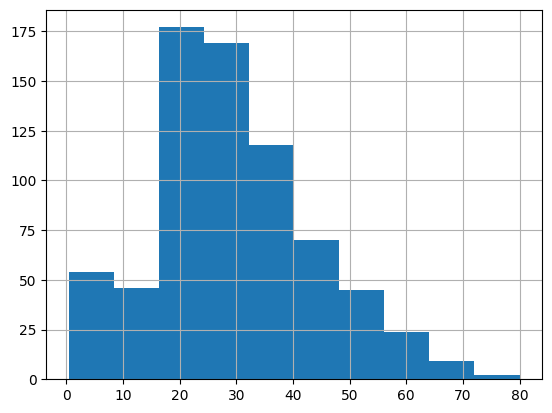

In [ ]:
titanic.age.hist()
plt.show()

And often the axis labels are taken care of

<Axes: title={'center': 'Mean Survival'}, xlabel='pclass'>

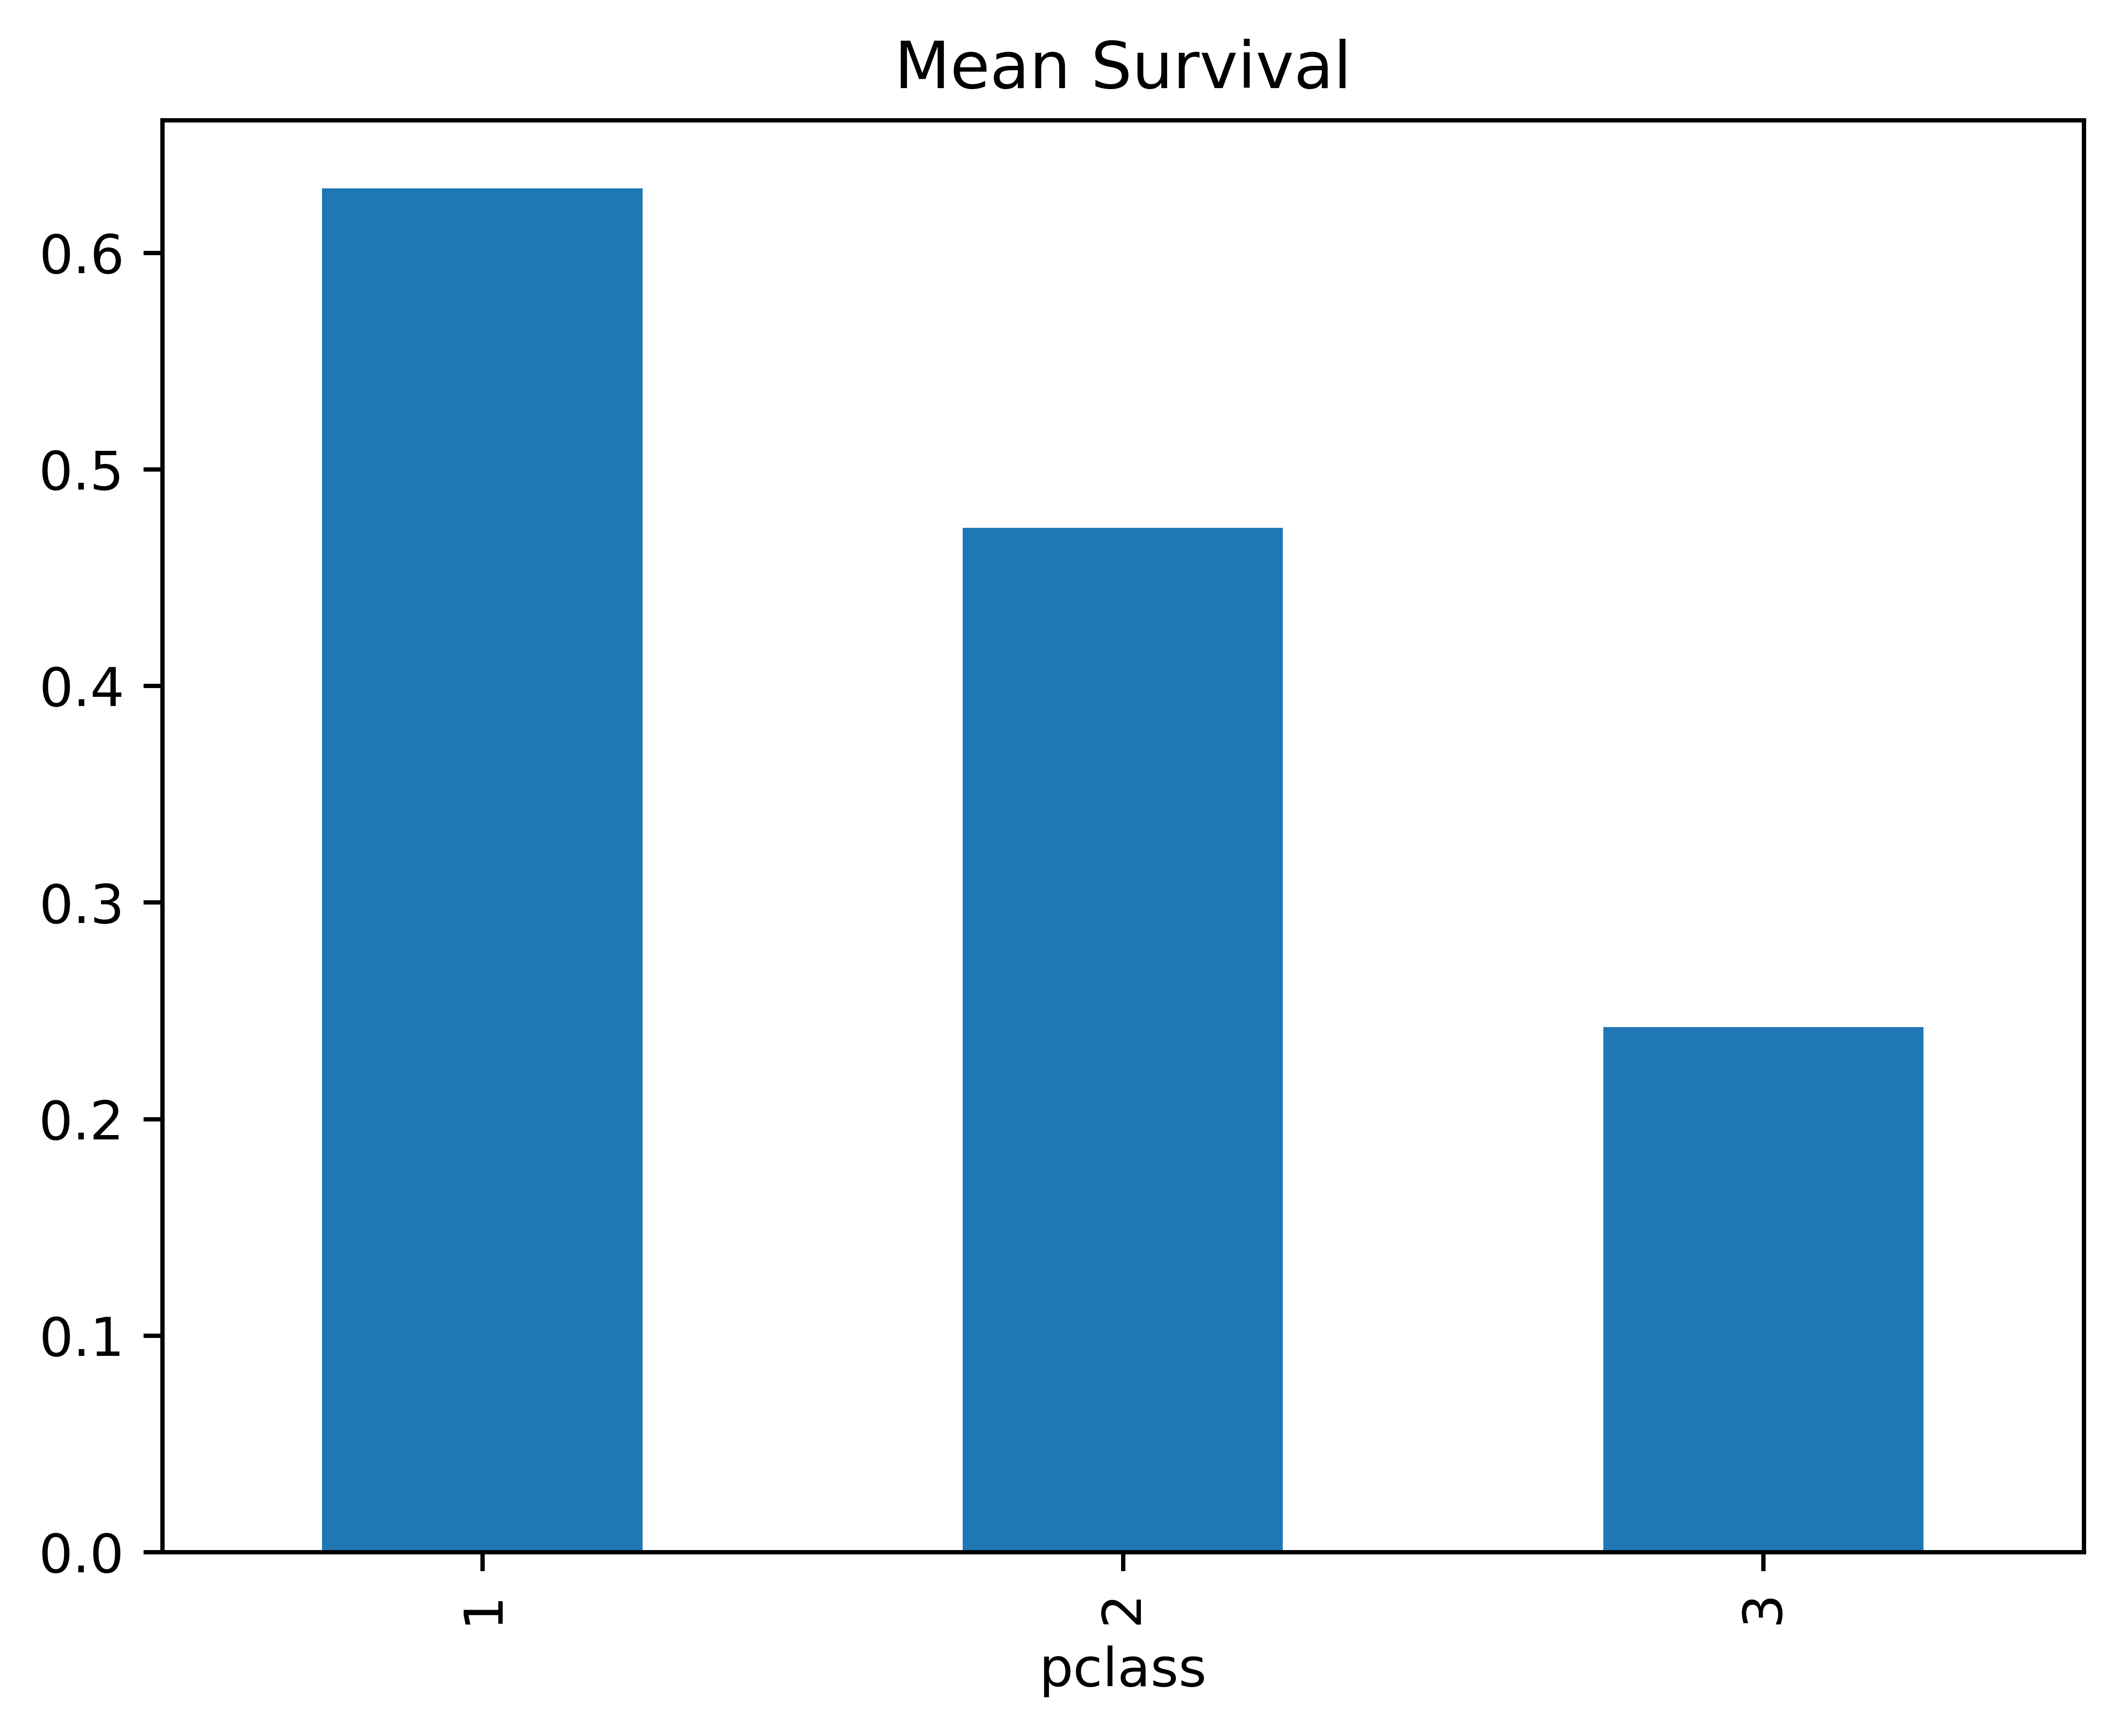

In [ ]:
#titanic.groupby("pclass").survived.mean().plot.bar()
SurvByPclass = titanic.groupby("pclass").survived.mean()

SurvByPclass.plot(kind="bar", title = "Mean Survival");

But you can customize each plot as you wish:

<Axes: title={'center': 'Mean Survival'}, xlabel='pclass'>

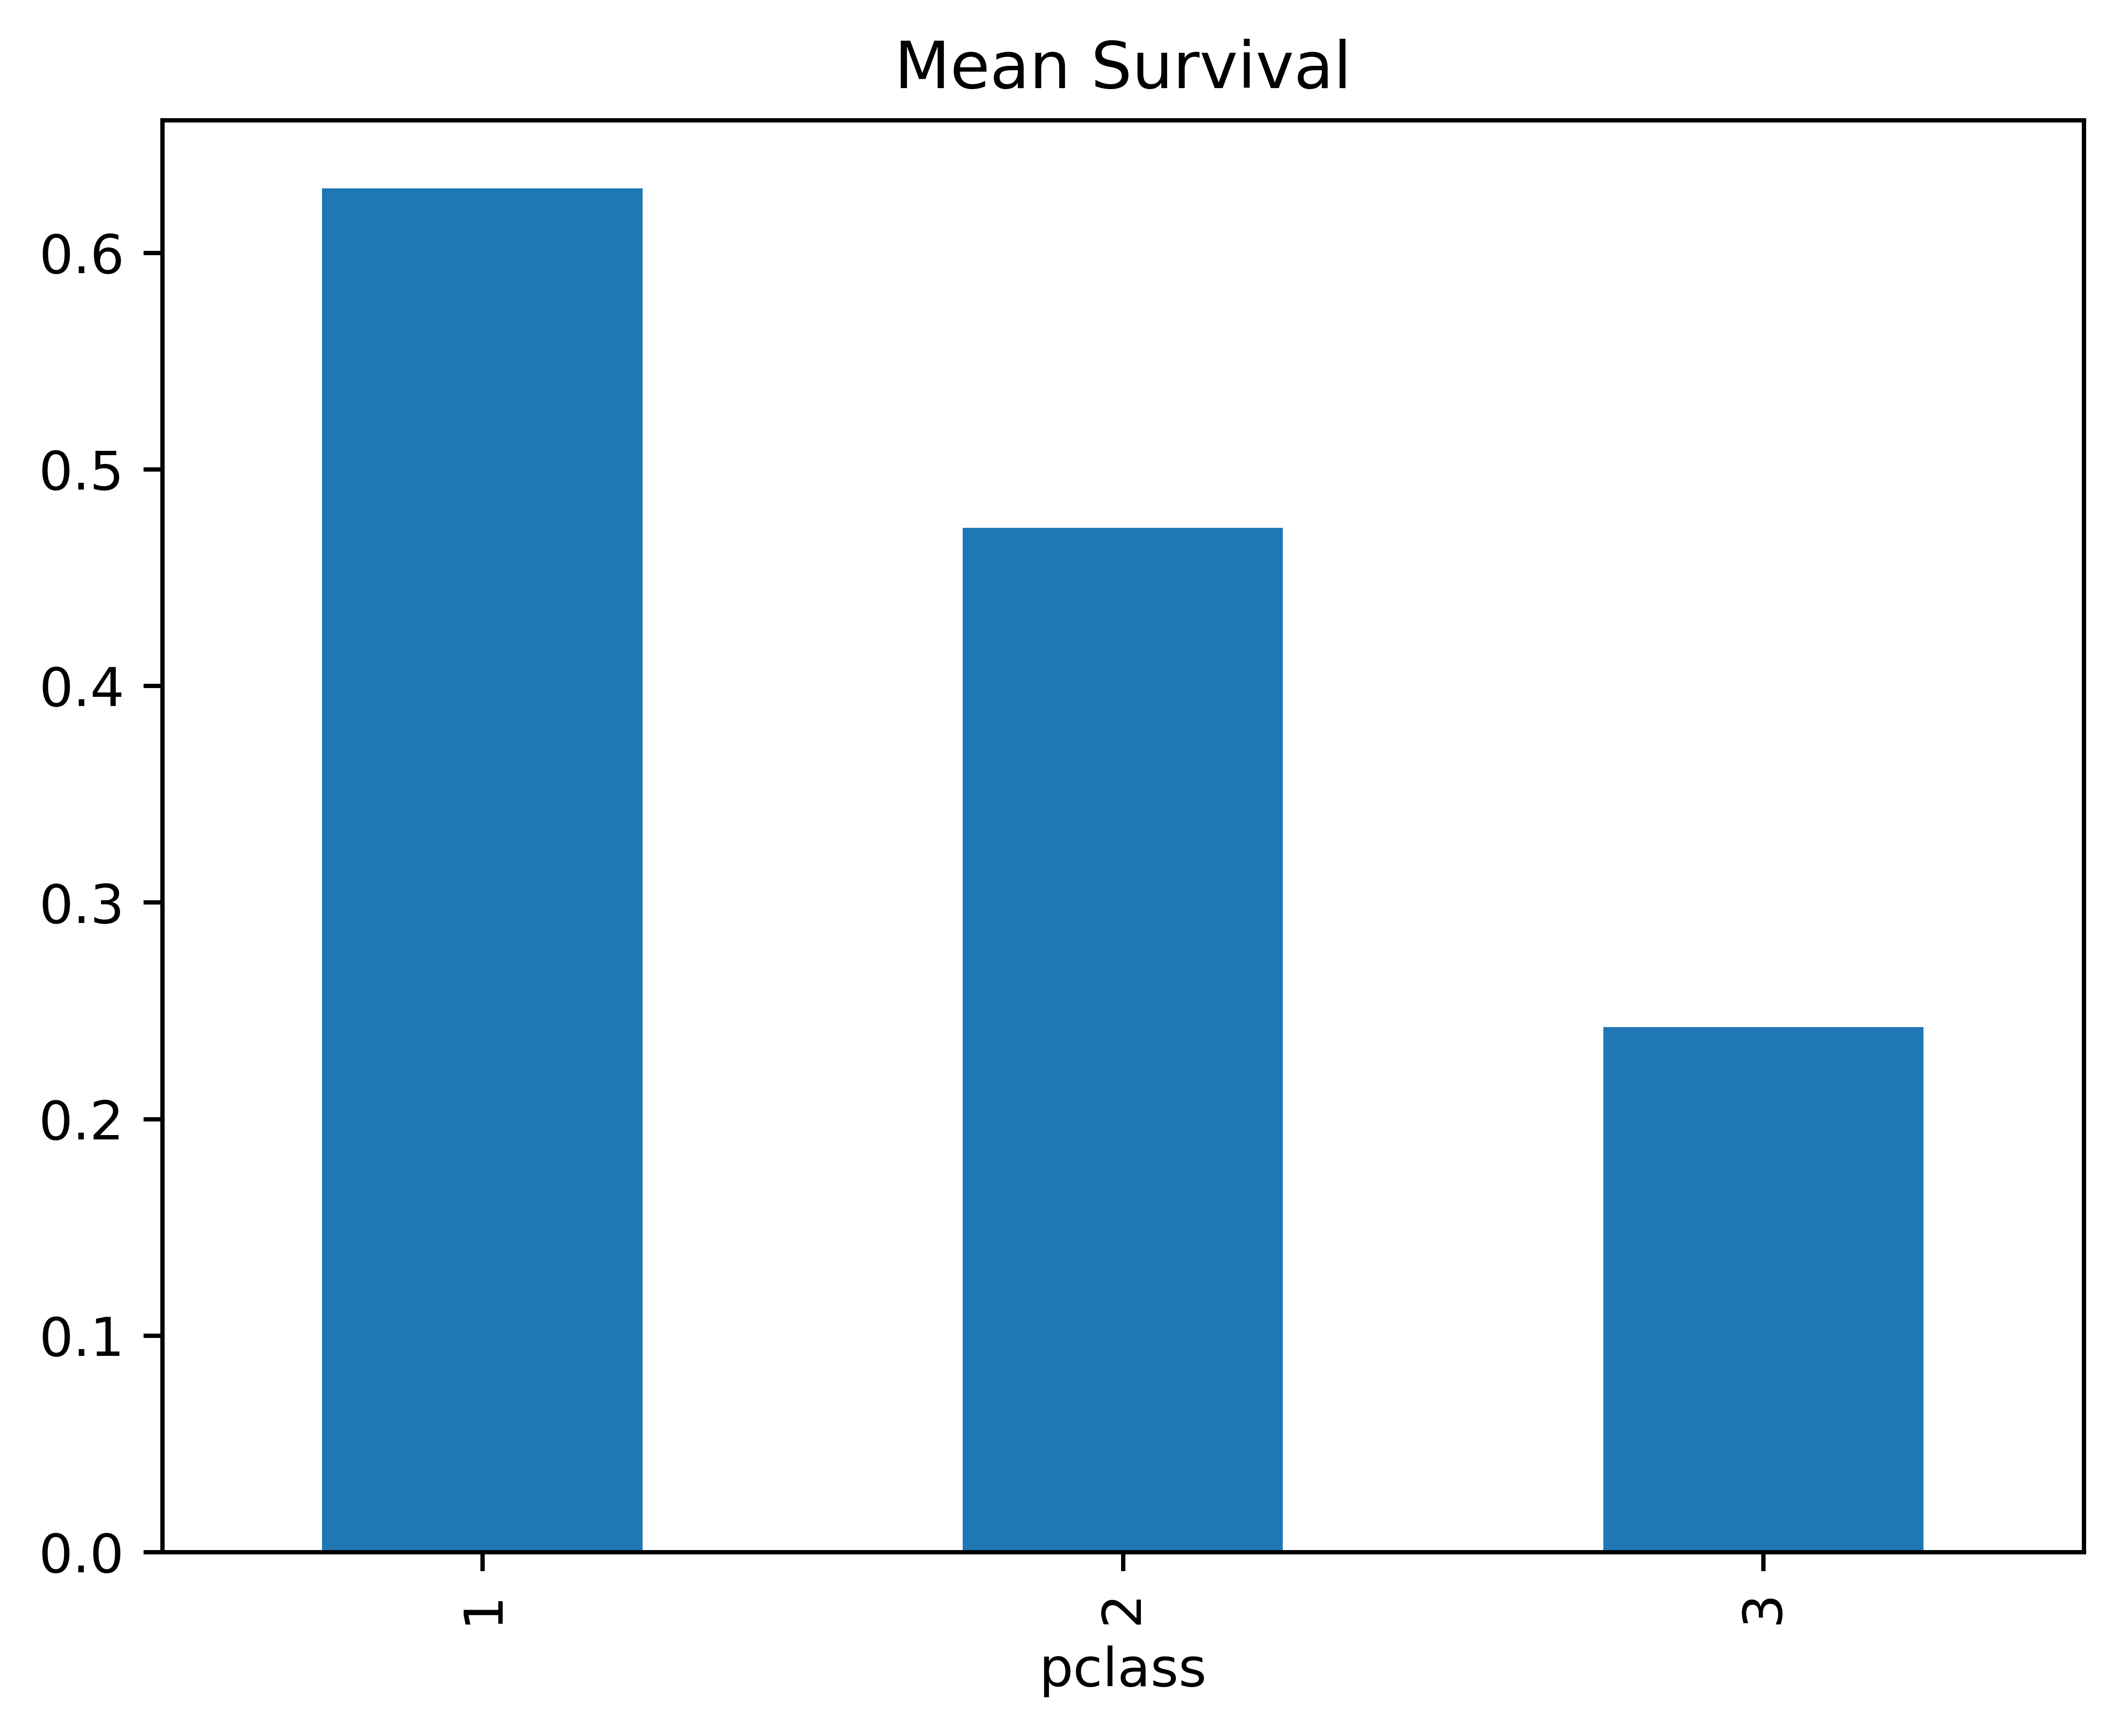

In [ ]:
SurvByPclass.plot(kind="bar", x = "Passenger Class", y = "Survived", title = "Mean Survival");

Tasks:

* Compute the avg. life expectancy in the gapminder data for each year
* Plot this as a line plot and give meaningful x and y labels and a title

<Axes: title={'center': 'Average life Expectancvy per year'}, xlabel='year'>

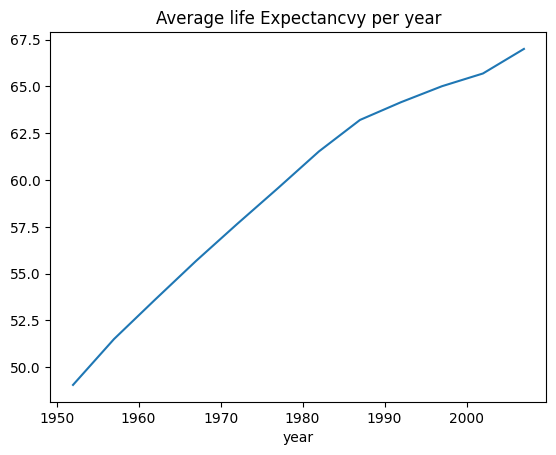

In [ ]:
lifeExpbyYear = gapminder.groupby("year")["lifeExp"].mean()

lifeExpbyYear.plot(y= "avg. life Exp", title = "Average life Expectancvy per year");

_________________________

## Advanced topics

### Creating Dataframes

1. Zip
2. From list of dicts

### Indexing:

1. multilevel indexes 
2. sorting 
3. asking for ranges

## Types of columns

1. categorical
2. dates

In [ ]:
# Creating Dataframes
#using zip
# List1
Name = ['tom', 'krish', 'nick', 'juli']
  
# List2
Age = [25, 30, 26, 22]
  
# get the list of tuples from two lists.
# and merge them by using zip().
list_of_tuples = list(zip(Name, Age))
list_of_tuples = zip(Name, Age)
# Assign data to tuples.
#print(list_of_tuples)
  
  
# Converting lists of tuples into
# pandas Dataframe.
df = pd.DataFrame(list_of_tuples,
                  columns=['Name', 'Age'])
  
# Print data.
df

,Name,Age
0,tom,25
1,krish,30
2,nick,26
3,juli,22


In [ ]:
#from list of dicts
data = [{'a': 1, 'b': 2, 'c': 3},
        {'a': 10, 'b': 20, 'c': 30}]
  
# Creates DataFrame.
df = pd.DataFrame(data)
  
df

,a,b,c
0,1,2,3
1,10,20,30


In [ ]:
# Indexing:

advLesson = True
if advLesson:
    frame2 = frame.set_index(["year", "state"])
    print(frame2)
    frame3 = frame2.sort_index()
    print(frame3)
    print(frame.loc[:,"state":"year"])

             pop
year state      
2000 Ohio    1.5
2001 Ohio    1.7
2002 Ohio    3.6
2001 Nevada  2.4
2002 Nevada  2.9
2003 Nevada  3.2
             pop
year state      
2000 Ohio    1.5
2001 Nevada  2.4
     Ohio    1.7
2002 Nevada  2.9
     Ohio    3.6
2003 Nevada  3.2
    state  year
0    Ohio  2000
1    Ohio  2001
2    Ohio  2002
3  Nevada  2001
4  Nevada  2002
5  Nevada  2003


### Inplace

Note that I reassigned the objects in the code above. That is because most operations, such as `set_index`, `sort_index`, `drop`, etc. do not operate **inplace** unless specified!